In [3]:
#importing all required packages
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 
import seaborn as sn
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
#Set working directory
os.chdir("C:\\Users\\HP\\Desktop\\Edwisor\\Project 1")

In [5]:
#Load data
Absenteeism_Data = pd.read_csv("Absenteeism_at_work_Project.csv")

In [17]:
#View Data
Absenteeism_Data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [ ]:
##########-------------------------------------EXPLORATORY DATA ANALYSIS---------------------------------------------##########

In [18]:
#Re-naming Columns
Absenteeism_Data = Absenteeism_Data.rename(columns = {'ID':'Emp_Id','Reason for absence':'Abs_Reason',
'Month of absence':'Abs_Month','Day of the week':'Abs_Day','Seasons':'Abs_Season',
'Transportation expense': 'Transport_Expense','Distance from Residence to Work':'Office_Dist(in Km)',
'Service time':'Service_Time','Age':'Emp_Age','Work load Average/day ':'Avg_Workload',
'Hit target': 'Hit_Target','Disciplinary failure':'Disciplinary_Failure','Education':'Highest_Degree',
'Son':'Num_of_Children','Pet':'Num_of_Pets','Weight':'Emp_Weight(in kg)','Height':'Emp_Height(in cm)',
'Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'Emp_BMI',
'Absenteeism time in hours':'Abs_Hrs'})

In [6]:
#Eliminating blank observations
Absenteeism_Data = Absenteeism_Data[(Absenteeism_Data.Abs_Hrs > 0)]
Absenteeism_Data = Absenteeism_Data[(pd.notnull(Absenteeism_Data.Abs_Month)) & ~(Absenteeism_Data.Abs_Month == 0)]

In [ ]:
##########----------------------------------------MISSING VALUE ANALYSIS---------------------------------------------##########

In [7]:
#Percentage of missing values in each variable
(Absenteeism_Data.isna().sum() / Absenteeism_Data.shape[0])*100

Emp_Id                  0.000000
Abs_Reason              0.440529
Abs_Month               0.000000
Abs_Day                 0.000000
Abs_Season              0.000000
Transport_Expense       0.881057
Office_Dist(in Km)      0.440529
Service_Time            0.440529
Emp_Age                 0.293686
Avg_Workload            1.174743
Hit_Target              0.881057
Disciplinary_Failure    0.734214
Highest_Degree          1.468429
Num_of_Children         0.881057
Drinker                 0.440529
Smoker                  0.587372
Num_of_Pets             0.293686
Emp_Weight(in kg)       0.146843
Emp_Height(in cm)       1.908957
Emp_BMI                 3.964758
Abs_Hrs                 0.000000
dtype: float64

In [8]:
New_Subset = ['Transport_Expense','Office_Distance','Service_Time','Emp_Age','Hit_Target',
                'Disciplinary_Failure','Highest_Degree','Num_of_Children','Num_of_Pets','Emp_Weight','Emp_Height',
                'Drinker','Smoker','Emp_BMI']

#----impute missing values and Nas --------
for i in Absenteeism_Data['Emp_Id'].unique(): 
    for j in New_Subset :
        Absenteeism_Data.loc[((Absenteeism_Data['Emp_Id'] == i) & (Absenteeism_Data[j].isna())), j] = Absenteeism_Data[(Absenteeism_Data.Emp_Id==i)][j].max()

In [9]:
#Sorting Values
Absenteeism_Data[['Emp_Id','Abs_Month','Avg_Workload']].sort_values(['Emp_Id','Abs_Month','Avg_Workload'])

,Emp_Id,Abs_Month,Avg_Workload
361,1,1.0,330061.0
395,1,3.0,244387.0
401,1,3.0,244387.0
665,1,4.0,246288.0
202,1,4.0,326452.0
674,1,5.0,237656.0
439,1,5.0,246074.0
459,1,6.0,253957.0
229,1,6.0,377550.0
9,1,7.0,239554.0


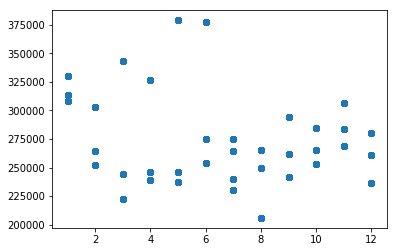

In [10]:
#Scatter Plots
plt.scatter(x='Abs_Month', y='Avg_Workload', s=None, c=None, marker=None, data=Absenteeism_Data)

In [11]:
# update workload with the mode of corresponding month's workload
for i in Absenteeism_Data['Abs_Month'].unique(): 
    Recur_load = stats.mode(Absenteeism_Data[Absenteeism_Data['Abs_Month']==i]['Avg_Workload'])[0][0]
    Absenteeism_Data.loc[((Absenteeism_Data['Abs_Month']==i) & pd.isna(Absenteeism_Data['Avg_Workload'])),'Avg_Workload'] = Recur_load

In [12]:
Absenteeism_Data.Abs_Hrs = Absenteeism_Data.Abs_Hrs.fillna(0)

In [13]:
#Identifying different types of variables
cat_var = ['Abs_Reason','Abs_Month','Abs_Day','Abs_Season','Disciplinary_Failure','Highest_Degree','Num_of_Children','Drinker','Smoker','Num_of_Pets']
cont_var = ['Emp_Id','Transport_Expense','Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload','Hit_Target','Emp_Weight(in kg)','Emp_Height(in cm)','Emp_BMI']
tar_var = ['Abs_Hrs']

for i in cat_var:
    Absenteeism_Data[i] = Absenteeism_Data[i].astype("category")ntifying different types of variables

In [ ]:
#############----------------------------------OUTLIER ANALYSIS-----------------------------------------------##############

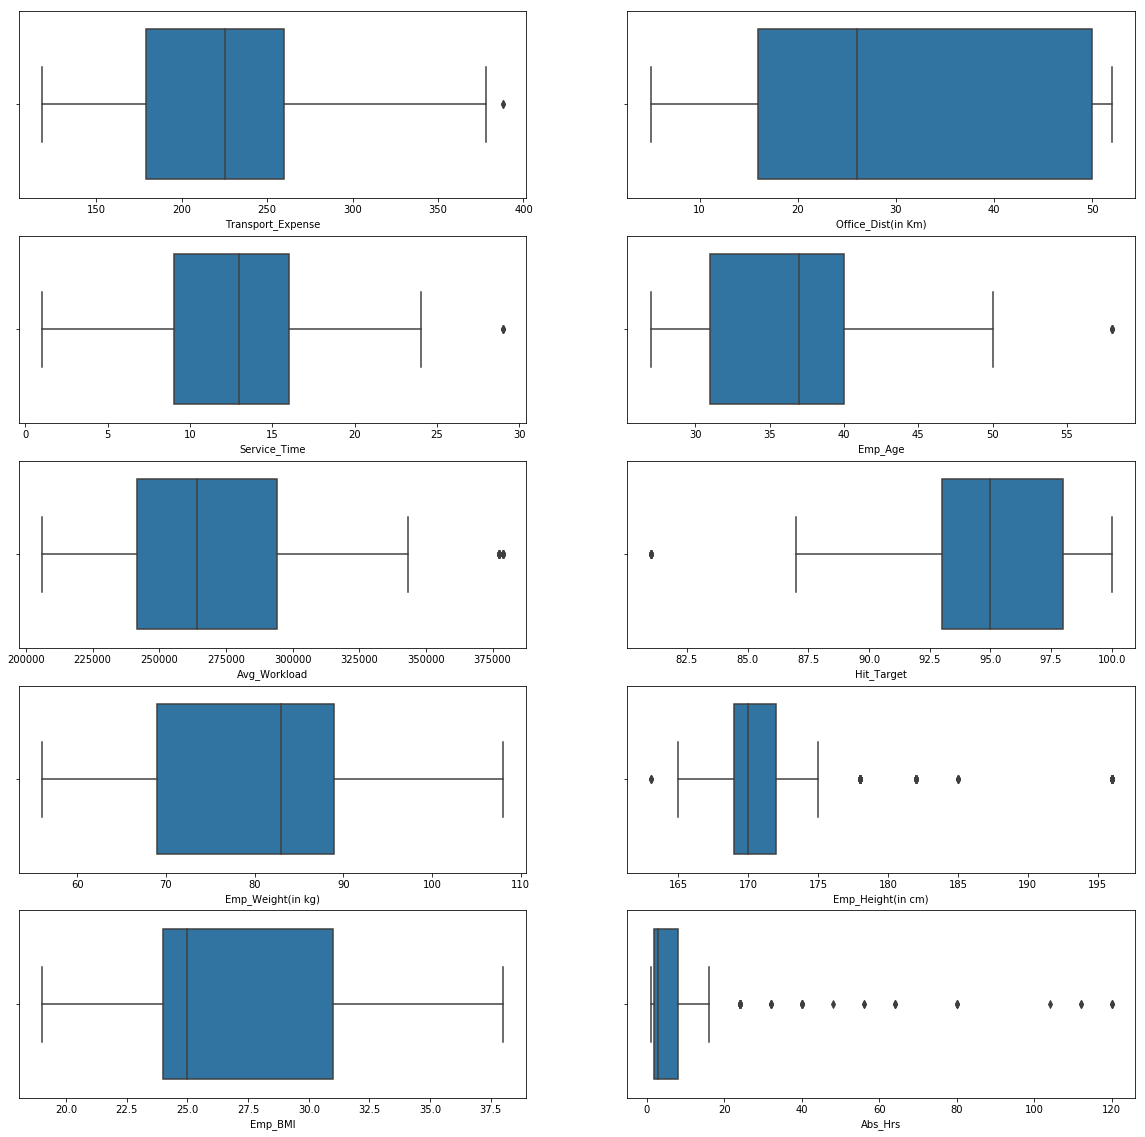

In [14]:
box = ['Transport_Expense','Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload','Hit_Target','Emp_Weight(in kg)','Emp_Height(in cm)','Emp_BMI','Abs_Hrs']
row = 5
col = 2
i = 0
j=0
k=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while i < row:
    j =0
    while j < col:
        sn.boxplot(x=box[k], y=None, hue=None, data=Absenteeism_Data, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[i,j])
        j=j+1
        k=k+1
    i=i+1

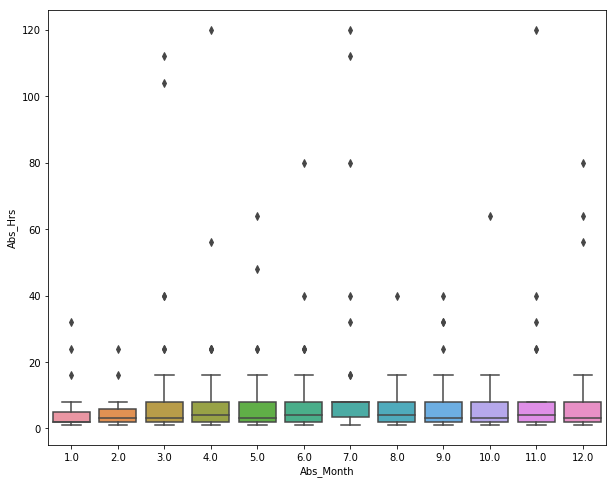

In [15]:
#Box-Plots
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,8)
sn.boxplot(x=Absenteeism_Data['Abs_Month'], y='Abs_Hrs', hue=None, data=Absenteeism_Data, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax)

In [ ]:
###################----------------------------FEATURE SELECTION--------------------------------------------------#############

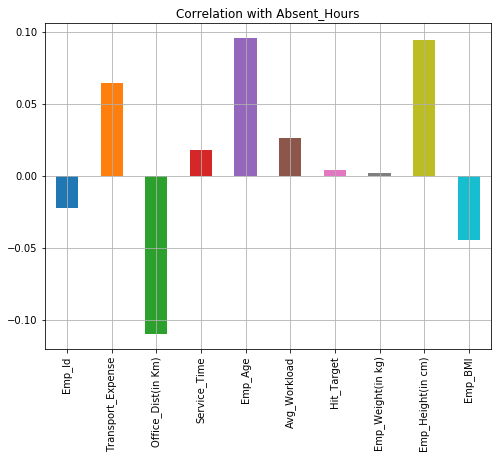

In [16]:
#Correlation
cor=Absenteeism_Data[cont_var].corrwith(Absenteeism_Data.Abs_Hrs)
cor.plot.bar(figsize=(8,6), title='Correlation with Absent_Hours', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

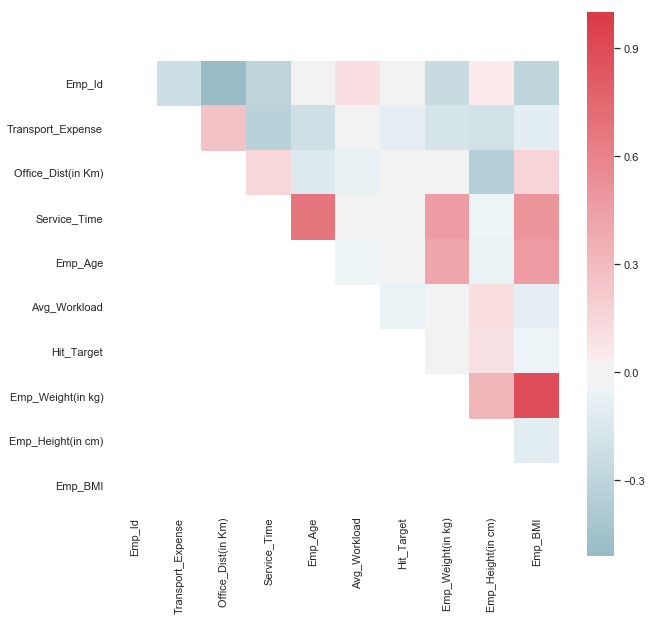

In [17]:
#Dependency of variables
cor = Absenteeism_Data[cont_var].corr()
sn.set(style='white')
mask =np.zeros_like(cor, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(10,10))
cmap=sn.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
sn.heatmap(cor, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


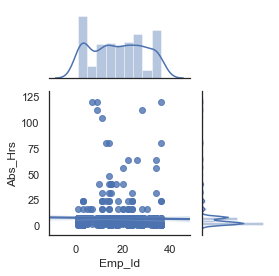

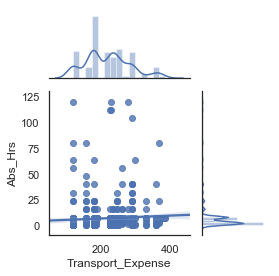

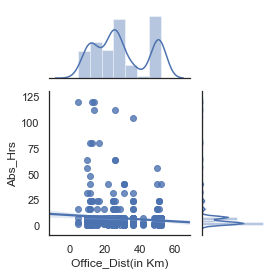

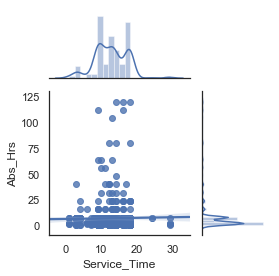

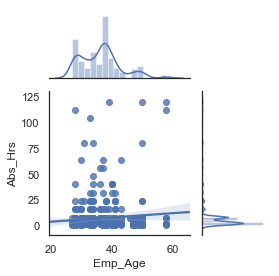

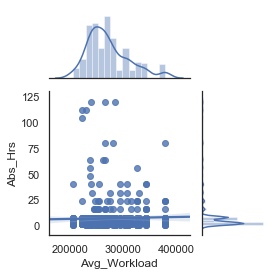

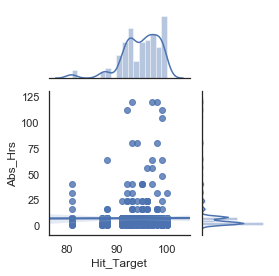

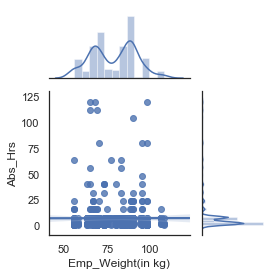

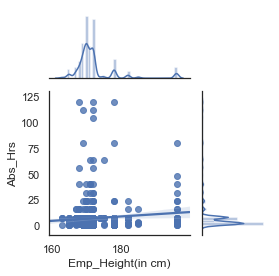

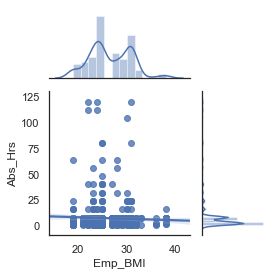

In [18]:
#Joint Plot for target variable
for i in cont_var:
    sn.jointplot(i, "Abs_Hrs", data=Absenteeism_Data, kind='reg', color='b', height=4, ratio=2, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None)

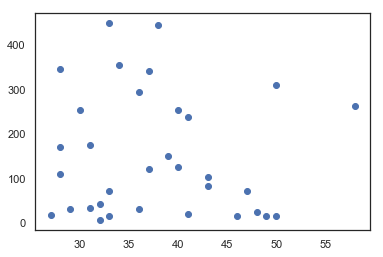

In [19]:
#--- Checking the effect of 'Age' on 'Absence'
#--- Aggregate data by 'Age' and by total hours of absence
Hours = Absenteeism_Data[['Emp_Id','Abs_Hrs']].groupby('Emp_Id').sum().reset_index()
Age = Absenteeism_Data[['Emp_Id','Emp_Age']].groupby('Emp_Id').max().reset_index()
Abs_age = Hours.merge(Age, how='inner',left_on='Emp_Id', right_on='Emp_Id')

plt.scatter('Emp_Age', 'Abs_Hrs', data=Abs_age)

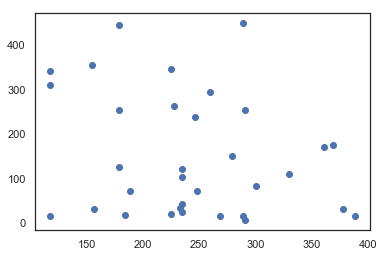

In [20]:
#--- Checking the effect of 'Transportation_Expense' on 'Absence'
#--- Aggregate data by 'Transportation_Expense' and by total hours of absence

Expense = Absenteeism_Data[['Emp_Id','Transport_Expense']].groupby('Emp_Id').max().reset_index()
Abs_Expense = Hours.merge(Expense, how='inner',left_on='Emp_Id', right_on='Emp_Id')

plt.scatter('Transport_Expense', 'Abs_Hrs', data=Abs_Expense)

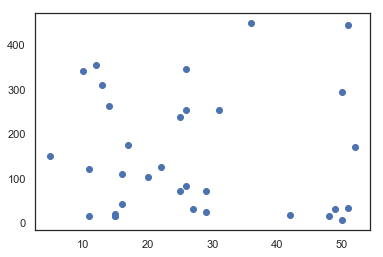

In [21]:
#--- Checking the effect of 'Work_Distance' on 'Absence'
#--- Aggregate data by 'Work_Distance' and by total hours of absence

Distance = Absenteeism_Data[['Emp_Id','Office_Dist(in Km)']].groupby('Emp_Id').max().reset_index()
Abs_Distance = Hours.merge(Distance, how='inner',left_on='Emp_Id', right_on='Emp_Id')

plt.scatter('Office_Dist(in Km)', 'Abs_Hrs', data=Abs_Distance)

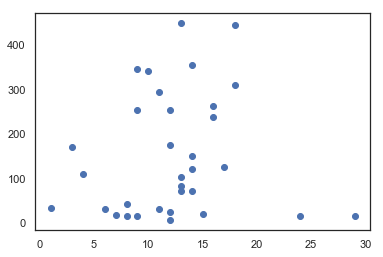

In [22]:
#--- Checking the effect of 'Service_Time' on 'Absence'
#--- Aggregate data by 'Service_Time' and by total hours of absence

Serv_Time = Absenteeism_Data[['Emp_Id','Service_Time']].groupby('Emp_Id').max().reset_index()
Abs_SrvcTime = Hours.merge(Serv_Time, how='inner',left_on='Emp_Id', right_on='Emp_Id')

plt.scatter('Service_Time', 'Abs_Hrs', data=Abs_SrvcTime)

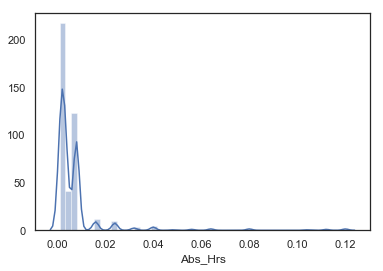

In [23]:
sn.distplot(Absenteeism_Data['Abs_Hrs']/1000, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)


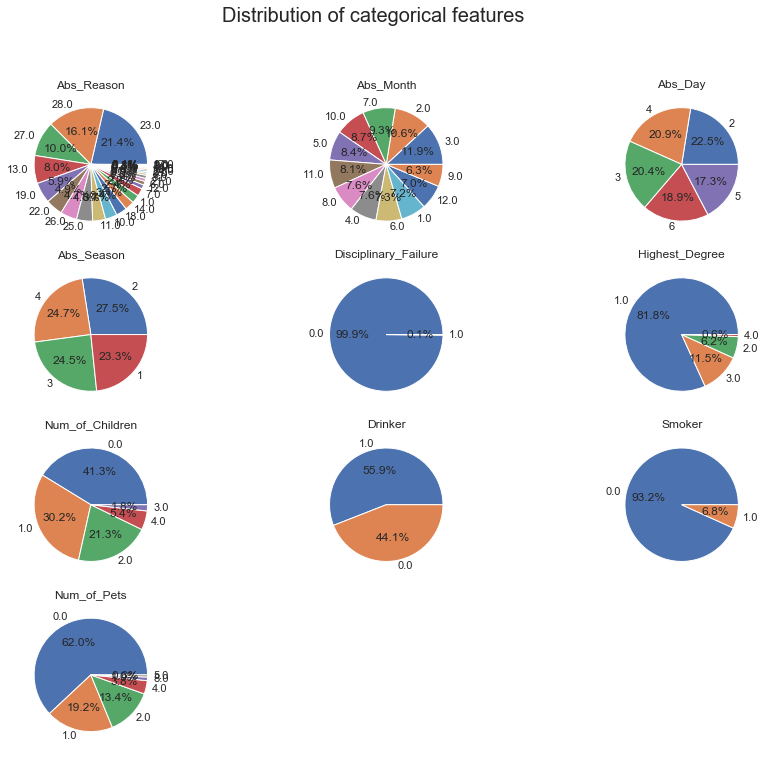

In [24]:
##checking the pie chart distribution of categorical variables
Cat_Pi=Absenteeism_Data[cat_var]
plt.figure(figsize=(15,12))
plt.suptitle('Distribution of categorical features', fontsize=20)
for i in range(1,Cat_Pi.shape[1]+1):
    plt.subplot(4,3,i)
    f=plt.gca()
    f.set_title(Cat_Pi.columns.values[i-1])
    values=Cat_Pi.iloc[:,i-1].value_counts(normalize=True).values
    index=Cat_Pi.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')


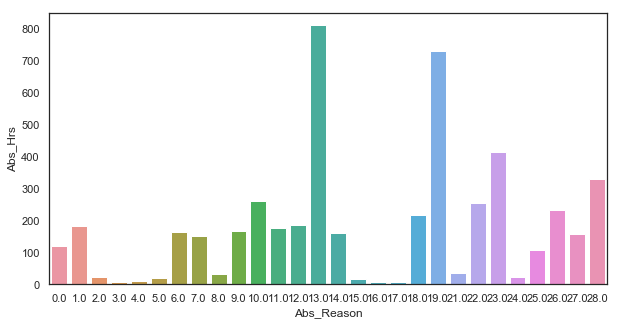

In [25]:
#--- Checking for the reason of Absence---
#checking the top reasons for absence as per the total numbers of absence
Reason = Absenteeism_Data[['Abs_Reason','Abs_Hrs']].groupby('Abs_Reason').sum().sort_values('Abs_Reason').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Abs_Reason', y='Abs_Hrs', hue=None, data=Reason, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

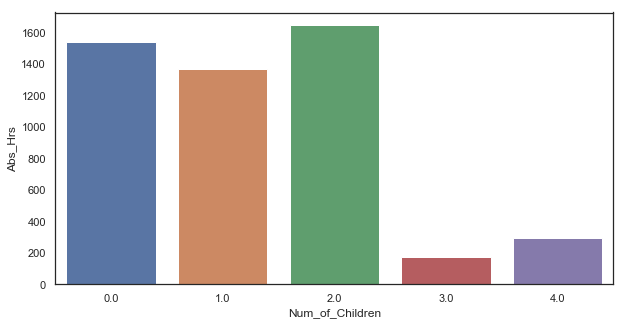

In [26]:
#Analyzing absence dependency of no of kids
Children = Absenteeism_Data[['Num_of_Children','Abs_Hrs']].groupby('Num_of_Children').sum().sort_values('Abs_Hrs').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Num_of_Children', y='Abs_Hrs', hue=None, data=Children, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

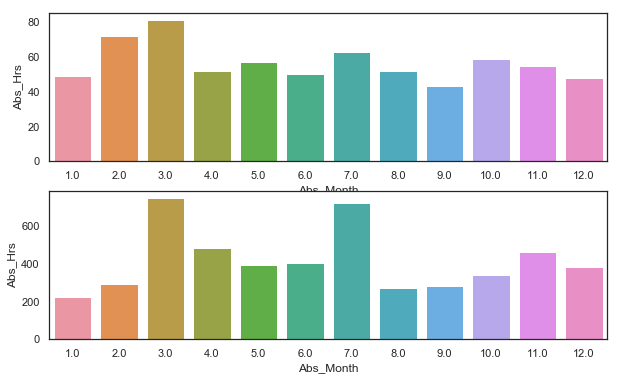

In [27]:
#Analyzing absence dependency of month of year

#--leaves by frquency 
Frequency = Absenteeism_Data[['Abs_Month','Abs_Hrs']].groupby('Abs_Month').count().sort_values('Abs_Hrs').reset_index()

#--Leaves by total hours
Total_Hrs = Absenteeism_Data[['Abs_Month','Abs_Hrs']].groupby('Abs_Month').sum().sort_values('Abs_Hrs').reset_index()
fig,ax = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,6)
sn.barplot(x='Abs_Month', y='Abs_Hrs', hue=None, data=Frequency, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[0])
sn.barplot(x='Abs_Month', y='Abs_Hrs', hue=None, data=Total_Hrs, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[1])

In [ ]:
############----------------------------------FEATURE SELECTION-------------------------------------------###################

In [28]:
#Eliminating unwanted variables
Absenteeism_Sample  = Absenteeism_Data[['Emp_Id','Abs_Month','Num_of_Children','Drinker','Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload','Abs_Hrs']]

In [29]:
#----Lets aggregate the data on 'Month' and 'Id'
Absenteeism_Num = Absenteeism_Sample[['Emp_Id','Abs_Month','Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload']].groupby(['Emp_Id','Abs_Month']).max().reset_index()
Absenteeism_Target = Absenteeism_Sample[['Emp_Id','Abs_Month','Abs_Hrs']].groupby(['Emp_Id','Abs_Month']).sum().reset_index()
Absenteeism_Cat = Absenteeism_Data[['Emp_Id','Abs_Month','Num_of_Children','Drinker']].groupby(['Emp_Id','Abs_Month']).max().reset_index()
Absenteeism = Absenteeism_Num.merge(Absenteeism_Cat, how='inner',left_on=['Emp_Id','Abs_Month'], right_on=['Emp_Id','Abs_Month']).merge(Absenteeism_Target, how='inner',left_on=['Emp_Id','Abs_Month'], right_on=['Emp_Id','Abs_Month'])
Absenteeism.head()

,Emp_Id,Abs_Month,Office_Dist(in Km),Service_Time,Emp_Age,Avg_Workload,Drinker,Num_of_Children,Abs_Hrs
0,1,1.0,11.0,14.0,37.0,330061.0,0.0,1.0,1.0
1,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3.0,11.0,14.0,37.0,244387.0,0.0,1.0,16.0
3,1,4.0,11.0,14.0,37.0,326452.0,0.0,1.0,11.0
4,1,5.0,11.0,14.0,37.0,246074.0,0.0,1.0,16.0


In [30]:
#--- Lets deal with Nans introduced(same way already done above, by imputing)

#---- imputing Nan values with max each value present for a particular id. eg. Age will always be same for any id.
final_col = ['Office_Dist(in Km)','Service_Time','Emp_Age','Drinker','Num_of_Children']
#----impute missing values and Nas --------
for i in Absenteeism['Emp_Id'].unique(): 
    for j in final_col :
        Absenteeism.loc[((Absenteeism['Emp_Id'] == i) & (Absenteeism[j].isna())), j] = Absenteeism[(Absenteeism.Emp_Id==i)][j].max()
        
# update workload with the mode of corresponding month's workload
for i in Absenteeism['Abs_Month'].unique(): 
    frequent_wrkld = stats.mode(Absenteeism[Absenteeism['Abs_Month']==i]['Avg_Workload'])[0][0]
    Absenteeism.loc[((Absenteeism['Abs_Month']==i) & pd.isna(Absenteeism['Avg_Workload'])),'Avg_Workload'] = frequent_wrkld

#update NA 'Absent_Hours' with 0
Absenteeism.Abs_Hrs = Absenteeism.Abs_Hrs.fillna(0)

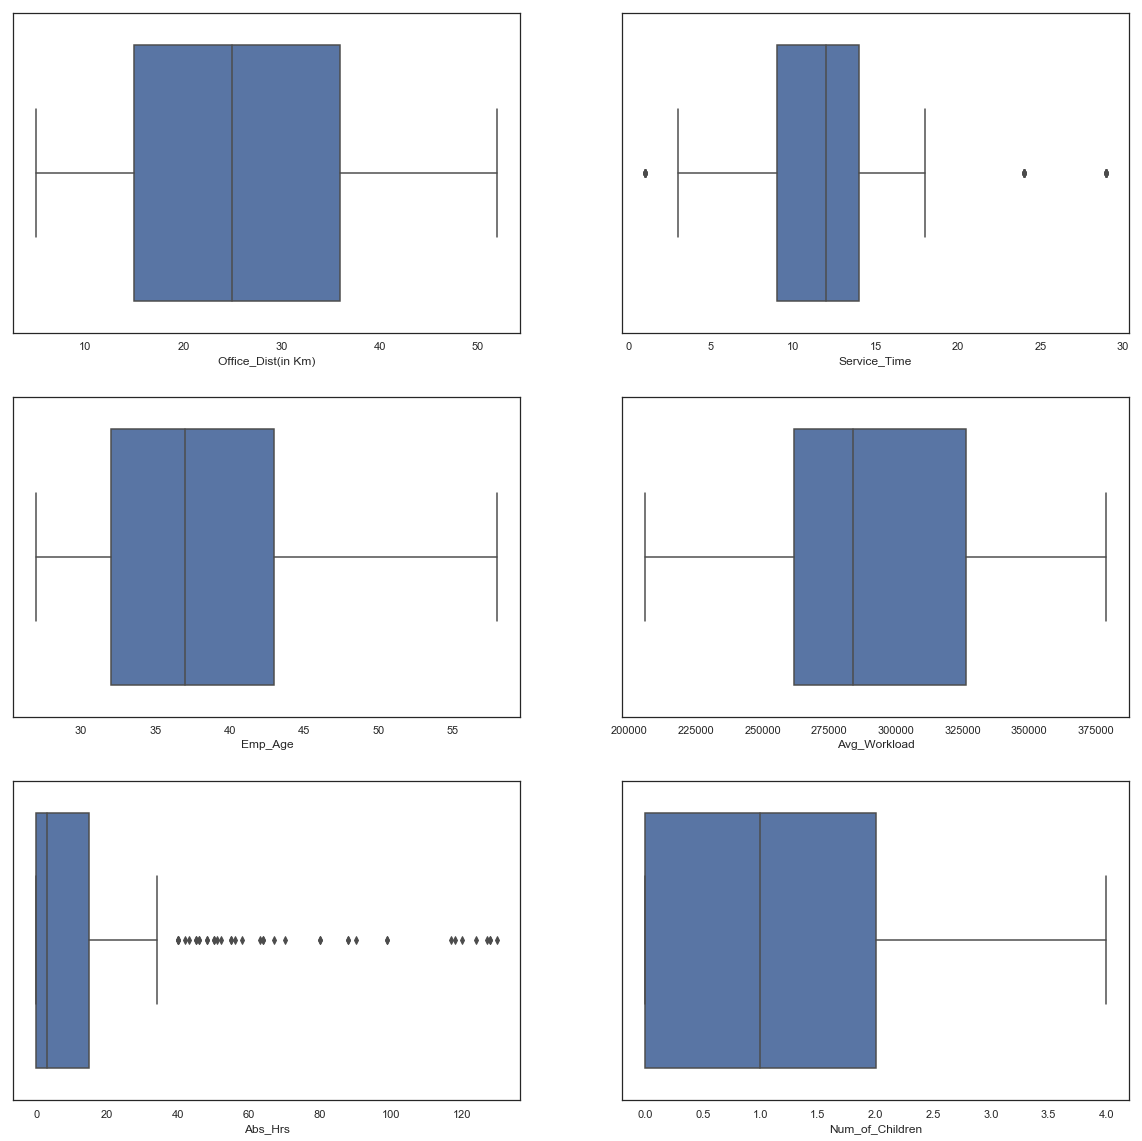

In [32]:
#----- Lets check for any outliers in the aggregated data -----
cont_var = ['Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload','Abs_Hrs','Num_of_Children']
row = 3
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=cont_var[i], y=None, hue=None, data=Absenteeism, order=None, orient=None, ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [33]:
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)
    q3 = np.percentile(df_in[col_name],75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [34]:
#--- remove out liers
cont_var = ['Service_Time','Emp_Age','Abs_Hrs']
for i in cont_var:
    Absenteeism = remove_outlier(Absenteeism,i)


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


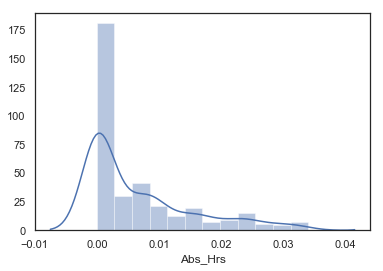

In [35]:
# Check the distribution of target feature.
#It seems better distributed then previous
sn.distplot(Absenteeism['Abs_Hrs']/1000, bins=None, hist=True, kde=True)

In [ ]:
Absenteeism.head()

In [36]:
#Standardize Continuous variables
def Standardize_Values(df):
    df_new = df
    var = ['Office_Dist(in Km)','Service_Time','Emp_Age','Avg_Workload']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [37]:
Absenteeism_Final = Standardize_Values(Absenteeism)


In [ ]:
##############--------------------------------------------MODEL DEVELOPMENT-------------------------------####################

In [38]:
#--- define a function which takes model, predicted and test values and returns evalution matrix: R-squared value,RootMeanSquared,MeanAbsoluteError
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [39]:
#train,test = train_test_split(emp_final, test_size=0.20, random_state=1)
train = Absenteeism_Final[:80]
test = Absenteeism_Final[20:]
X_train = train.drop(columns = ['Abs_Hrs','Emp_Id'])
#Y_train = np.log(train.Absent_Hours)
Y_train = train.Abs_Hrs/1000
X_test = test.drop(columns = ['Abs_Hrs','Emp_Id'])
#Y_test = np.log(test.Absent_Hours)
Y_test = test.Abs_Hrs/1000

In [ ]:
#--Define Linear regession model --
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [ ]:
#------- Random Forest Model (Ensemble method using Bagging technique) --------------
forest_reg = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=20, min_impurity_decrease=0.00, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [ ]:
## ----------- Building XGBoost Model (Ensemble method using Boosting technique) ---------------
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=2000, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=15, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)

In [ ]:
#---Stroring all model performances in dataframe to compare----
metric=[]
ml_models=['Linear Reg','Random Forest','GradientBoost']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','RootMeanSquaredError']]

In [ ]:
##########---------------------------PREDICTION---------------######################

In [41]:
#For 2010
absence_prediction=X_test
absence_prediction['Abs_Hrs'] = 1000*Y_test
absence_prediction['Predicted_Absent_Hours'] = 1000*Y_predict_forest
#final_bike_prediction_df['Predicted_Absent_Hours'] = round(final_bike_prediction_df['Predicted_Absent_Hours'])


In [42]:
#--- Sample output(with actual counts and predicted counts) ---
absence_prediction

,Abs_Month,Office_Dist(in Km),Service_Time,Emp_Age,Avg_Workload,Drinker,Num_of_Children,Abs_Hrs,Predicted_Absent_Hours
20,9.0,0.489362,0.400000,0.086957,0.677170,0.0,1.0,0.0,0.728110
21,10.0,0.489362,0.400000,0.086957,0.543635,0.0,1.0,0.0,0.636678
22,11.0,0.489362,0.400000,0.086957,0.419381,0.0,1.0,0.0,0.928148
23,12.0,0.489362,0.400000,0.086957,0.568519,0.0,1.0,0.0,1.224625
24,1.0,0.021277,0.000000,0.521739,0.282268,1.0,0.0,10.0,12.757273
28,5.0,0.021277,0.000000,0.521739,0.000000,1.0,0.0,14.0,15.507485
30,7.0,0.021277,0.000000,0.521739,0.598796,1.0,0.0,26.0,23.492336
31,8.0,0.021277,0.000000,0.521739,0.746310,1.0,0.0,21.0,17.003688
33,10.0,0.021277,0.000000,0.521739,0.543635,1.0,0.0,15.0,18.038918
34,11.0,0.021277,0.000000,0.521739,0.419381,1.0,0.0,25.0,19.351935


In [44]:
#--------data for 2011
#--- service and age will be added by 1

Absenteeism_Trend_2011 = Absenteeism
Absenteeism_Trend_2011.Service_Time = Absenteeism.Service_Time + 1
Absenteeism_Trend_2011.Emp_Age = Absenteeism.Emp_Age + 1

In [45]:
Absenteeism_Trend_2011= Absenteeism_Trend_2011.drop(columns = ['Abs_Hrs','Emp_Id'])

In [46]:
#-------- Standardise the scale, before passing the input to model
Absenteeism_Trend_2011 = Standardize_Values(Absenteeism_Trend_2011)
predict_2011_absence =forest_reg.predict(Absenteeism_Trend_2011)
absence_prediction_2011=Absenteeism_Trend_2011
absence_prediction_2011['Predicted_Absent_Hours'] = predict_2011_absence*1000

absence_prediction_2011


,Abs_Month,Office_Dist(in Km),Service_Time,Emp_Age,Avg_Workload,Drinker,Num_of_Children,Predicted_Absent_Hours
0,1.0,0.127660,0.733333,0.434783,0.717732,0.0,1.0,8.108978
1,2.0,0.127660,0.733333,0.434783,0.558881,0.0,1.0,7.982441
2,3.0,0.127660,0.733333,0.434783,0.222412,0.0,1.0,8.334661
3,4.0,0.127660,0.733333,0.434783,0.696867,0.0,1.0,9.926800
4,5.0,0.127660,0.733333,0.434783,0.232166,0.0,1.0,11.061267
5,6.0,0.127660,0.733333,0.434783,0.992288,0.0,1.0,14.350482
6,7.0,0.127660,0.733333,0.434783,0.339296,0.0,1.0,14.426430
7,8.0,0.127660,0.733333,0.434783,0.345141,0.0,1.0,13.604476
8,9.0,0.127660,0.733333,0.434783,0.322830,0.0,1.0,13.037695
9,10.0,0.127660,0.733333,0.434783,0.341684,0.0,1.0,12.775567


In [47]:
#2011 Prediction
monthly_absence= absence_prediction_2011.groupby('Abs_Month').sum().reset_index()[['Abs_Month','Predicted_Absent_Hours']]
monthly_absence

,Abs_Month,Predicted_Absent_Hours
0,1.0,211.186045
1,2.0,203.306515
2,3.0,211.620611
3,4.0,232.375406
4,5.0,276.597252
5,6.0,343.467553
6,7.0,263.807354
7,8.0,270.533101
8,9.0,245.851194
9,10.0,241.192035


,Abs_Month,Predicted_Absent_Hours,monthly_loss_percentage
0,1.0,211.186045,3.333113
1,2.0,203.306515,3.208752
2,3.0,211.620611,3.339972
3,4.0,232.375406,3.667541
4,5.0,276.597252,4.365487
5,6.0,343.467553,5.420889
6,7.0,263.807354,4.163626
7,8.0,270.533101,4.269777
8,9.0,245.851194,3.880227
9,10.0,241.192035,3.806692
